# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

sumber dataset : https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick as yb
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
from google.colab import drive
from scipy.stats.mstats import winsorize

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [42]:
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/MachineLearningSubmission/synthetic_beverage_sales_data.csv'
data = pd.read_csv(file_path) #mengambil dataset yang ada di gdrive

data.head() # memunculkan 5 baris awal dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


**note: sebelumnya saya coba mengambil dataset dengan menggunakan url gdrive saja namun terdapat error karena dataset yang terlalu besar, maka dari itu saya ubah ke mounted drive**

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1. Memahami Struktur Data**

In [43]:
data.info() # menampilkan statistik deskriptif dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


Berdasarkan distribusi data pada statistik deskriptif, berikut jenis data yang terdapat dalam dataset:


1.   Data Numerikal
 - Unit_Price: Harga satuan dari produk.

 - Quantity: Jumlah produk yang dipesan dalam satu transaksi.

 - Discount : Besaran diskon yang diberikan.

 - Total_Price : Total harga setelah perhitungan jumlah dan diskon.

2.   Data Kategorikal
 - Customer_Type: Kategori pelanggan, misalnya B2B atau B2C.

 - Product: Nama produk yang dipesan.

 - Category: Jenis Kategori produk, seperti Alcoholic, Water, Juices, Soft Drinks.

 - Region: Wilayah tempat pesanan dibuat.

 - Order_Date: Tanggal pemesanan dalam format teks.

 - Order_ID: Identitas unik untuk setiap pesanan. (kita tidak membutuhkan nya)

 - Customer_ID: Identitas unik pelanggan. (kita tidak membutuhkan nya)



In [44]:
data.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


In [45]:
# Karena dataset terlalu besar maka saya memutuskan untuk mengambil 10000 sample data secara acak
data = data.sample(n=100000, random_state=70, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  int64  
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.4+ MB


### **2. Menangani Data yang Hilang**

In [46]:
print("Jumlah data yang hilang per kolom:")
data.isnull().sum()

Jumlah data yang hilang per kolom:


,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


terlihat bahwa tidak ada data yang hilang, maka kita bisa lanjut ke step berikutnya

### **3. Analisis Distribusi dan Korelasi**

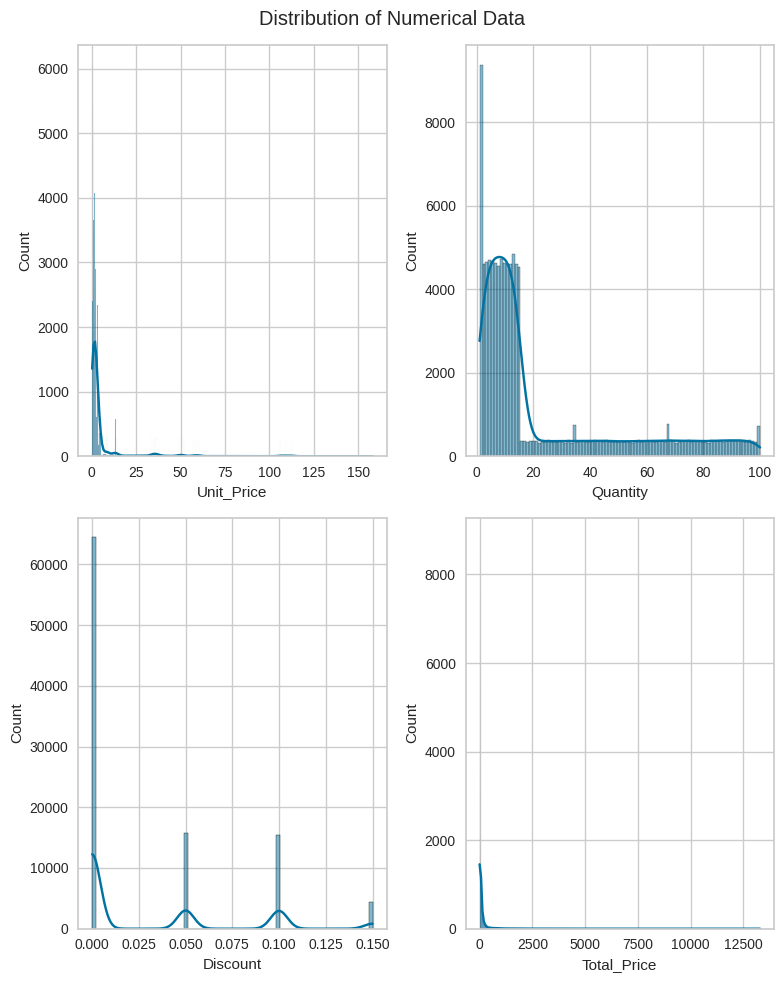

In [47]:
# Ambil kolom data numerik dari Dataset
numerical_data = data.select_dtypes(include=['number']).columns

# Visualisasi distribusi data numerik histogram
fig, axes = plt.subplots(2, 2, figsize=(8, 10))
for i, col in enumerate(numerical_data):
    sns.histplot(data[col], ax=axes[i//2, i%2], kde=True)
plt.suptitle("Distribution of Numerical Data")
plt.tight_layout()
plt.show()

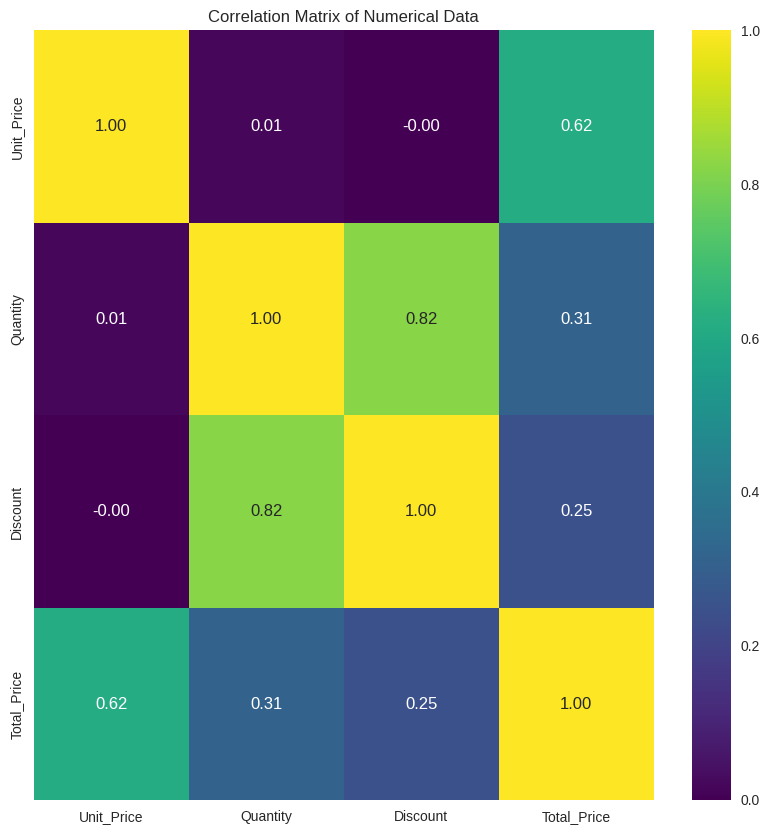

In [48]:
# hubungan antar variabel numerik dengan matriks korelasi
plt.figure(figsize=(10, 10))
corr_matrix = data[numerical_data].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Data')
plt.show()

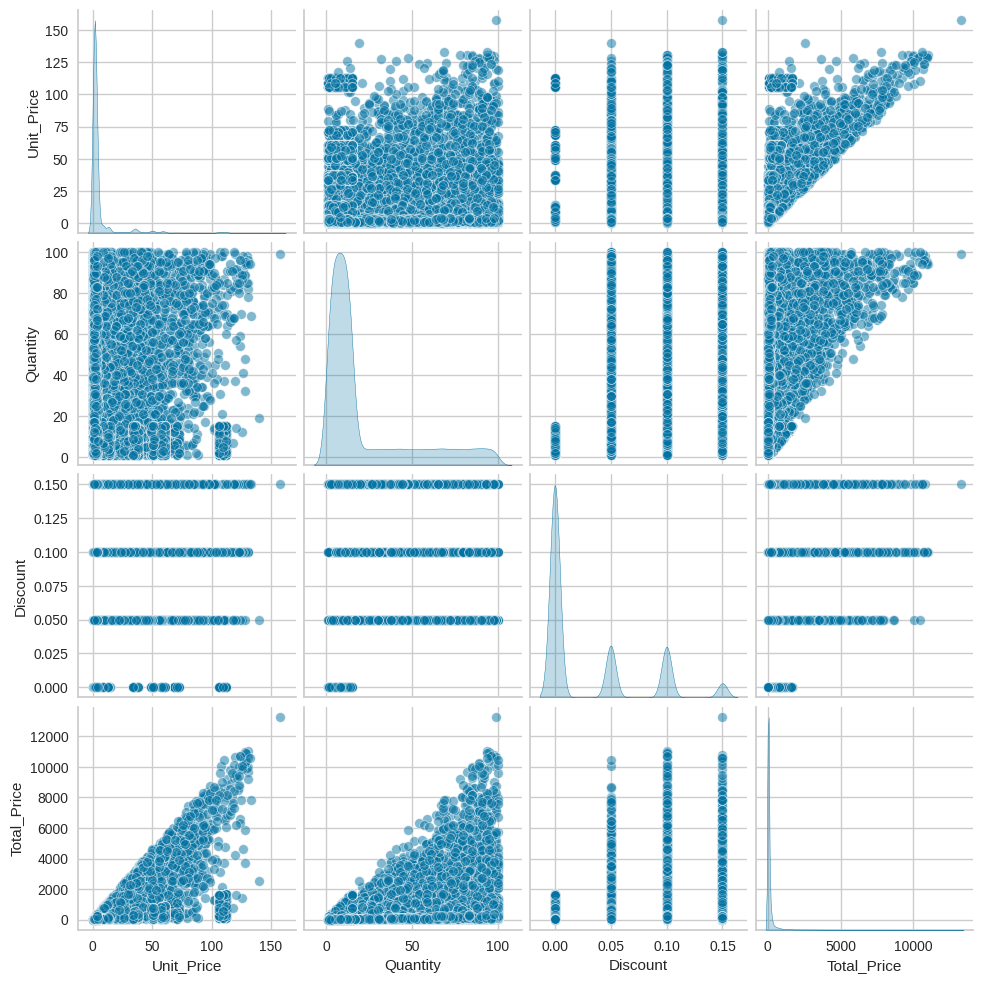

In [49]:

# hubungan antar variabel numerik dengan pairplot
sns.pairplot(data[numerical_data], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


### **4. Visualisasi Data**

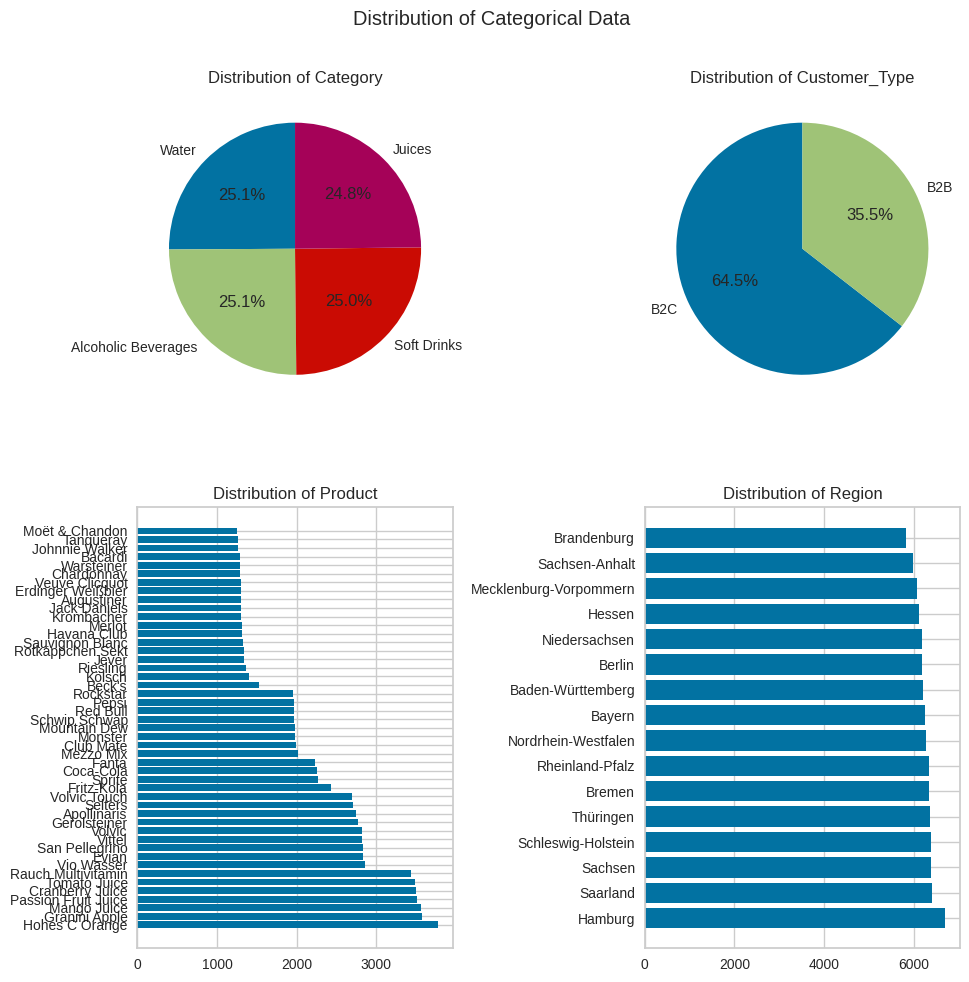

In [50]:
# Ambil nama kolom data kategorikal
categorical_data = ['Category','Customer_Type','Product','Region']

# Visualisasi distribusi data kategorikal
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Diagram distribusi Category
category_count = data['Category'].value_counts()
axes[0,0].pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Category')

# Diagram distribusi Customer_Type
customer_type_count = data['Customer_Type'].value_counts()
axes[0,1].pie(customer_type_count, labels=customer_type_count.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribution of Customer_Type')

# Diagram distribusi Product
product_count = data['Product'].value_counts()
axes[1,0].barh(product_count.index, product_count.values)
axes[1,0].set_title('Distribution of Product')

# Diagram distribusi Region
region_count = data['Region'].value_counts()
axes[1,1].barh(region_count.index, region_count.values)
axes[1,1].set_title('Distribution of Region')

plt.tight_layout()
plt.suptitle("Distribution of Categorical Data")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [51]:
# Cek data kosong
print("Jumlah data kosong per kolom:")
data.isnull().sum()

Jumlah data kosong per kolom:


,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [52]:
# Cek data duplikat
print("Jumlah duplikat:", data.duplicated().sum())

Jumlah duplikat: 0


In [53]:
normalized = MinMaxScaler()

# Normalisasi data
data_normalized = data.copy()
data_normalized[['Quantity']] = normalized.fit_transform(data_normalized[['Quantity']])
data_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD802020,CUS654,B2C,Riesling,Alcoholic Beverages,4.19,0.020202,0.0,12.57,Thüringen,2022-09-03
1,ORD2412242,CUS7325,B2C,Krombacher,Alcoholic Beverages,1.63,0.070707,0.0,13.04,Berlin,2023-12-14
2,ORD2958854,CUS2033,B2C,Vio Wasser,Water,1.61,0.111111,0.0,19.32,Baden-Württemberg,2021-11-19
3,ORD667592,CUS5004,B2C,Monster,Soft Drinks,3.21,0.131313,0.0,44.94,Nordrhein-Westfalen,2022-04-04
4,ORD2967186,CUS7612,B2B,Mango Juice,Juices,4.28,0.767677,0.1,296.60,Mecklenburg-Vorpommern,2022-12-23


In [54]:
standarized = StandardScaler()

# Salin dataset
data_standar = data_normalized.copy()

# Standarisasi fitur numerik
data_standar[['Total_Price', 'Unit_Price']] = standarized.fit_transform(data_standar[['Total_Price', 'Unit_Price']])
data_standar.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD802020,CUS654,B2C,Riesling,Alcoholic Beverages,-0.111954,0.020202,0.0,-0.232084,Thüringen,2022-09-03
1,ORD2412242,CUS7325,B2C,Krombacher,Alcoholic Beverages,-0.284930,0.070707,0.0,-0.231160,Berlin,2023-12-14
2,ORD2958854,CUS2033,B2C,Vio Wasser,Water,-0.286281,0.111111,0.0,-0.218822,Baden-Württemberg,2021-11-19
3,ORD667592,CUS5004,B2C,Monster,Soft Drinks,-0.178171,0.131313,0.0,-0.168488,Nordrhein-Westfalen,2022-04-04
4,ORD2967186,CUS7612,B2B,Mango Juice,Juices,-0.105873,0.767677,0.1,0.325941,Mecklenburg-Vorpommern,2022-12-23


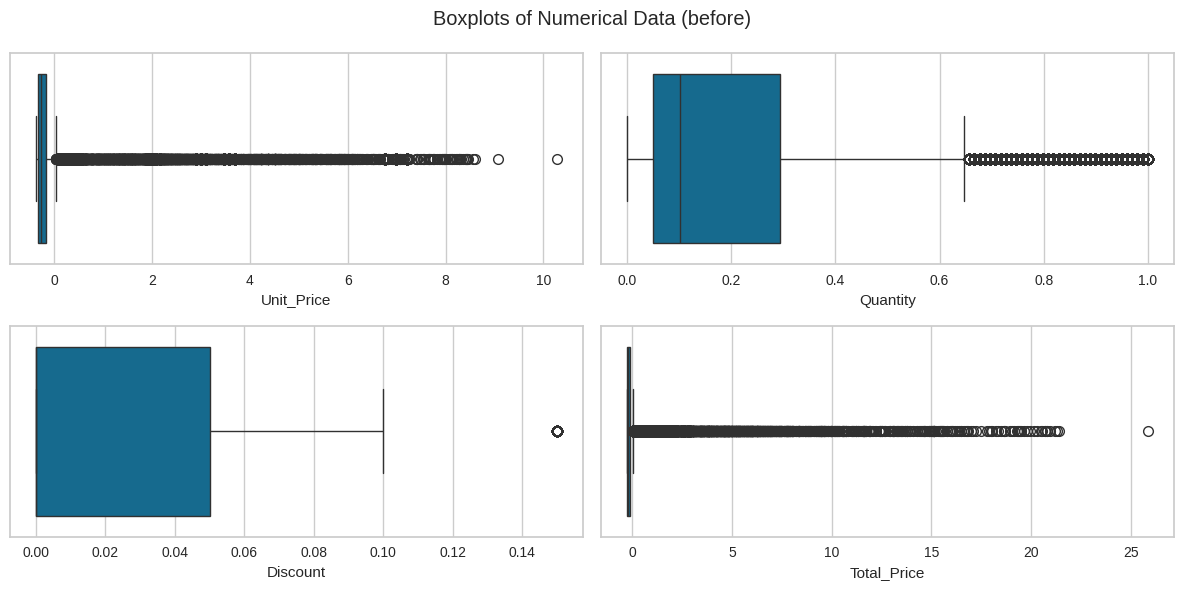

Jumlah data sebelum menghapus outlier: 100000


In [55]:
# boxplot sebelum penanganan outlier
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
for i, col in enumerate(numerical_data):
    sns.boxplot(x=data_standar[col], ax=axes[i//2, i%2])
plt.suptitle("Boxplots of Numerical Data (before)")
plt.tight_layout()
plt.show()

# memastikan data lengkap sebelum penanganan outlier
print("Jumlah data sebelum menghapus outlier:", data_standar.shape[0])

In [56]:
# nilai Q1, Q3, dan IQR (khusus data kolom numerik)
Q1 = data_standar[numerical_data].quantile(0.25)
Q3 = data_standar[numerical_data].quantile(0.75)
IQR = Q3 - Q1
# batas atas dan bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# penanganan outlier
mask = ~((data_standar[numerical_data] < lower_bound) | (data_standar[numerical_data] > upper_bound)).any(axis=1)
data_cleaned = data_standar[mask]

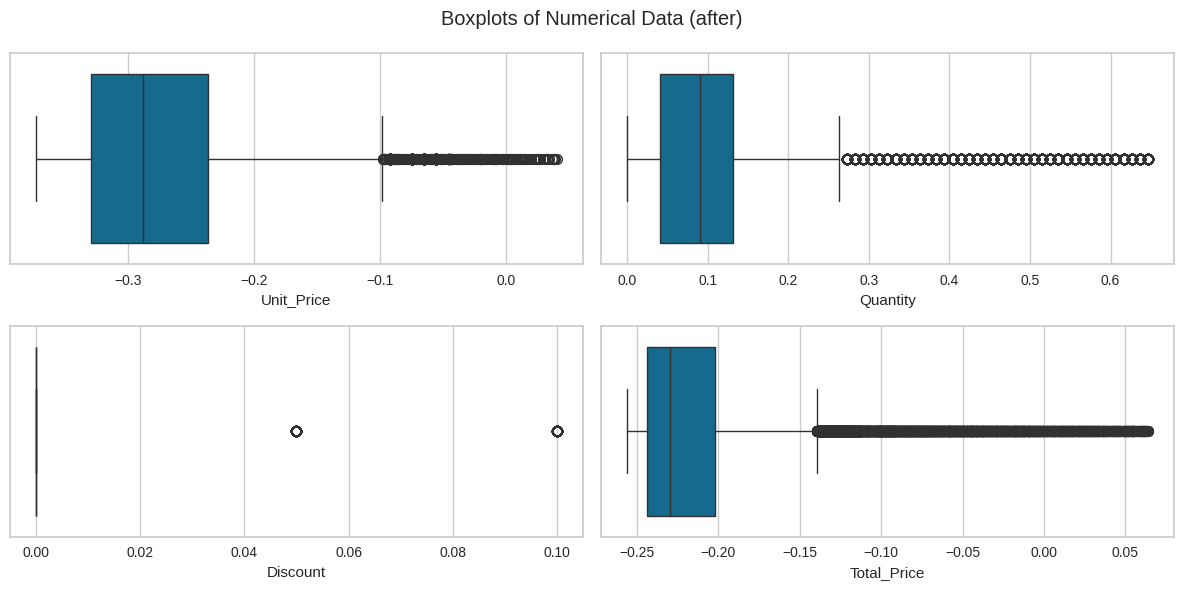

Jumlah data setelah menghapus outlier: 75195


In [57]:
# boxplot setelah penanganan outlier
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
for i, col in enumerate(numerical_data):
    sns.boxplot(x=data_cleaned[col], ax=axes[i//2, i%2])
plt.suptitle("Boxplots of Numerical Data (after)")
plt.tight_layout()
plt.show()

# memastikan penganan outlier bekerja dengan baik
print("Jumlah data setelah menghapus outlier:", data_cleaned.shape[0])

In [58]:

# Inisialisasi label encoder
label_encoder = LabelEncoder()
data_labeled = data_cleaned.copy()

# Label encoding
data_labeled[['Category', 'Region', 'Product']] = data_cleaned[['Category', 'Region', 'Product']].apply(label_encoder.fit_transform)


In [59]:
# one-hot encoding
data_encoded = pd.get_dummies(data_labeled, columns=['Customer_Type'])
data_encoded.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD802020,CUS654,26,0,-0.111954,0.020202,0.0,-0.232084,15,2022-09-03,False,True
1,ORD2412242,CUS7325,15,0,-0.284930,0.070707,0.0,-0.231160,2,2023-12-14,False,True
2,ORD2958854,CUS2033,35,3,-0.286281,0.111111,0.0,-0.218822,0,2021-11-19,False,True
3,ORD667592,CUS5004,20,2,-0.178171,0.131313,0.0,-0.168488,9,2022-04-04,False,True
5,ORD59826,CUS6292,0,3,-0.332228,0.000000,0.0,-0.254953,4,2021-11-06,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [60]:
# Tentukan fitur untuk pengelompokan data
features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Customer_Type_B2B', 'Customer_Type_B2C']
data_cluster = data_encoded[features]
data_cluster.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C
0,-0.111954,0.020202,0.0,-0.232084,False,True
1,-0.284930,0.070707,0.0,-0.231160,False,True
2,-0.286281,0.111111,0.0,-0.218822,False,True
3,-0.178171,0.131313,0.0,-0.168488,False,True
5,-0.332228,0.000000,0.0,-0.254953,False,True


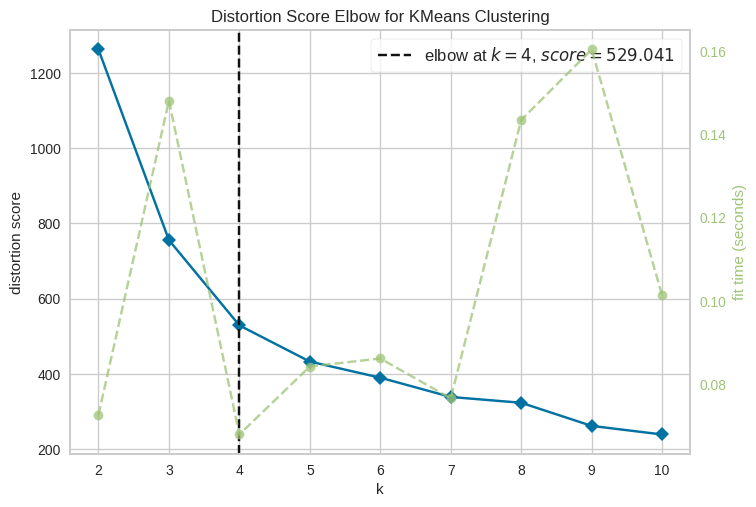

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
# Inisialisasi model KMeans
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 11))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(data_cluster)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [62]:
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=70)
    preds = clusterer.fit_predict(data_cluster)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_cluster, preds)
    print("Untuk n_clusters = {}, silhouette score = {}".format(n_clusters, score))

Untuk n_clusters = 2, silhouette score = 0.8999246641162756
Untuk n_clusters = 3, silhouette score = 0.8214605246432972
Untuk n_clusters = 4, silhouette score = 0.7964931174667962
Untuk n_clusters = 5, silhouette score = 0.4540119968159498
Untuk n_clusters = 6, silhouette score = 0.45334149418580005
Untuk n_clusters = 7, silhouette score = 0.3954565180149661
Untuk n_clusters = 8, silhouette score = 0.38105436389984965
Untuk n_clusters = 9, silhouette score = 0.37069061247835894


In [63]:
# Kurangi dimensi data menjadi 2 dengan PCA agar mudah untuk memvisualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_cluster)

In [64]:
# Ambil k optimal dari Elbow method
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=70, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=np.int64(4), random_state=70)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [65]:

# Hitung Silhouette Score
sil_score = silhouette_score(X_pca, kmeans.labels_)
print(f'Silhouette Score for K={optimal_k}: {sil_score}')

Silhouette Score for K=4: 0.869744150127408


## **c. Feature Selection (Opsional)**

 *Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.*

 Dikarenakan hasil silhoutte score sudah mencapai optimal (0.8+) maka tidak dibutuhkan feature selection

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

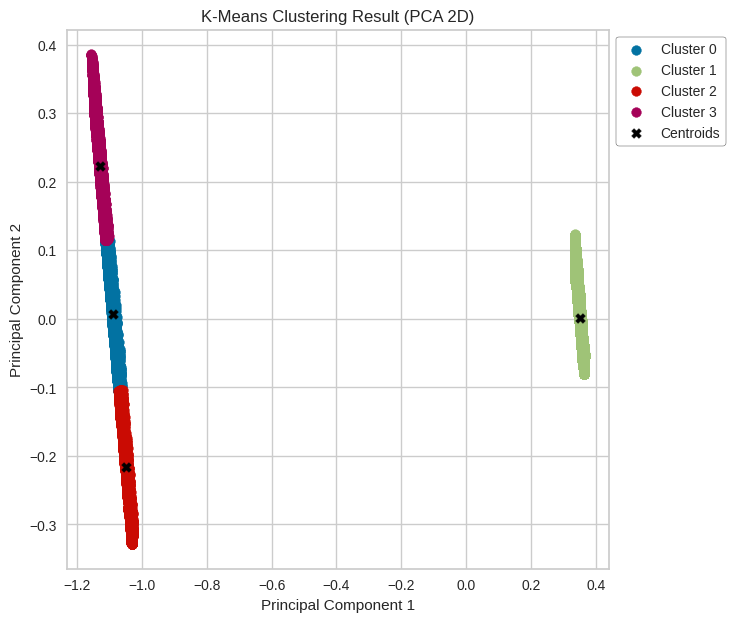

In [66]:
# Visualize setiap cluster
plt.figure(figsize=(7, 7))
for i in range(4):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.




In [67]:
# Tambahkan hasil clustering ke dataframe
data_labeled = data_cleaned.copy()
data_labeled['Cluster'] = kmeans.labels_
data_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD802020,CUS654,B2C,Riesling,Alcoholic Beverages,-0.111954,0.020202,0.0,-0.232084,Thüringen,2022-09-03,1
1,ORD2412242,CUS7325,B2C,Krombacher,Alcoholic Beverages,-0.284930,0.070707,0.0,-0.231160,Berlin,2023-12-14,1
2,ORD2958854,CUS2033,B2C,Vio Wasser,Water,-0.286281,0.111111,0.0,-0.218822,Baden-Württemberg,2021-11-19,1
3,ORD667592,CUS5004,B2C,Monster,Soft Drinks,-0.178171,0.131313,0.0,-0.168488,Nordrhein-Westfalen,2022-04-04,1
5,ORD59826,CUS6292,B2C,Apollinaris,Water,-0.332228,0.000000,0.0,-0.254953,Bremen,2021-11-06,1



Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi.

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru


In [68]:
data_labeled[['Quantity']] = normalized.inverse_transform(data_labeled[['Quantity']])

data_labeled[['Total_Price', 'Unit_Price']] = standarized.inverse_transform(data_labeled[['Total_Price', 'Unit_Price']])
data_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD802020,CUS654,B2C,Riesling,Alcoholic Beverages,4.19,3.0,0.0,12.57,Thüringen,2022-09-03,1
1,ORD2412242,CUS7325,B2C,Krombacher,Alcoholic Beverages,1.63,8.0,0.0,13.04,Berlin,2023-12-14,1
2,ORD2958854,CUS2033,B2C,Vio Wasser,Water,1.61,12.0,0.0,19.32,Baden-Württemberg,2021-11-19,1
3,ORD667592,CUS5004,B2C,Monster,Soft Drinks,3.21,14.0,0.0,44.94,Nordrhein-Westfalen,2022-04-04,1
5,ORD59826,CUS6292,B2C,Apollinaris,Water,0.93,1.0,0.0,0.93,Bremen,2021-11-06,1


In [69]:
# rata-rata setiap cluster
data_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.598142,32.787052,0.066677,46.844756
1,1.843442,7.978592,0.000000,14.696332
2,1.523600,11.312956,0.059054,15.397789
3,1.661229,53.616852,0.077424,80.620185


Customer_Type   B2B    B2C
Cluster                   
0              6194      0
1                 0  56895
2              6445      0
3              5661      0 



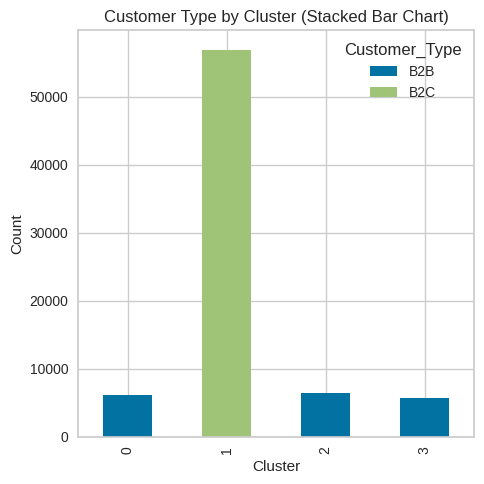

In [70]:
# Grup berdasarkan 'Cluster' dan 'Customer_Type' dan hitung kemunculan datanya
customer_type_cluster = data_labeled.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
print(customer_type_cluster,'\n')

# Plot dengan bar chart
customer_type_cluster.plot(kind='bar', stacked=True, figsize=(5, 5))
plt.title('Customer Type by Cluster (Stacked Bar Chart)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [71]:
data_labeled[data_labeled['Cluster'] == 0].describe()

,Unit_Price,Quantity,Discount,Total_Price,Cluster
count,6194.000000,6194.000000,6194.000000,6194.000000,6194.0
mean,1.598142,32.787052,0.066677,46.844756,0.0
std,1.030393,6.474934,0.023576,27.527161,0.0
min,0.320000,16.000000,0.050000,7.840000,0.0
25%,0.790000,27.000000,0.050000,24.910000,0.0
50%,1.280000,33.000000,0.050000,40.755000,0.0
75%,2.220000,38.000000,0.100000,63.540000,0.0
max,6.430000,47.000000,0.100000,162.590000,0.0


In [72]:
data_labeled[data_labeled['Cluster'] == 1].describe()

,Unit_Price,Quantity,Discount,Total_Price,Cluster
count,56895.000000,56895.000000,56895.0,56895.000000,56895.0
mean,1.843442,7.978592,0.0,14.696332,1.0
std,1.069502,4.320934,0.0,12.532016,0.0
min,0.460000,1.000000,0.0,0.460000,1.0
25%,1.010000,4.000000,0.0,5.450000,1.0
50%,1.610000,8.000000,0.0,11.130000,1.0
75%,2.380000,12.000000,0.0,20.400000,1.0
max,5.180000,15.000000,0.0,77.700000,1.0


In [73]:
data_labeled[data_labeled['Cluster'] == 2].describe()

,Unit_Price,Quantity,Discount,Total_Price,Cluster
count,6445.000000,6445.000000,6445.000000,6445.000000,6445.0
mean,1.523600,11.312956,0.059054,15.397789,2.0
std,1.030596,6.364348,0.019255,13.080481,0.0
min,0.320000,1.000000,0.050000,0.310000,2.0
25%,0.740000,6.000000,0.050000,5.810000,2.0
50%,1.190000,11.000000,0.050000,11.550000,2.0
75%,2.120000,17.000000,0.050000,21.160000,2.0
max,6.450000,24.000000,0.100000,89.680000,2.0


In [74]:
data_labeled[data_labeled['Cluster'] == 3].describe()

,Unit_Price,Quantity,Discount,Total_Price,Cluster
count,5661.000000,5661.000000,5661.000000,5661.000000,5661.0
mean,1.661229,53.616852,0.077424,80.620185,3.0
std,0.824873,6.568260,0.024884,37.907900,0.0
min,0.320000,36.000000,0.050000,15.300000,3.0
25%,0.980000,48.000000,0.050000,48.550000,3.0
50%,1.490000,53.000000,0.100000,74.390000,3.0
75%,2.320000,59.000000,0.100000,110.400000,3.0
max,4.710000,65.000000,0.100000,163.220000,3.0



# Analisis Karakteristik Cluster dari Model KMeans



**Berikut adalah analisis karakteristik untuk setiap cluster:**

**1. Cluster 0:**
- Rata-Rata (Unit Price): 1,59
- Rata-Rata (Quantity): 32,78 unit
- Rata-Rata (Discount): 6,6%
- Rata-Rata (Total Price): 46,84
- Jenis Pelanggan (Customer Type): B2B (Business to Business).
- Analisis: Pelanggan dalam cluster ini cenderung membeli dalam jumlah besar dengan diskon sedang, namun harga per unit relatif rendah. Hal ini bisa mencerminkan pelanggan tipe grosir atau reseller, yang biasanya membeli banyak untuk dijual kembali, untuk mendapatkan diskon.

**2. Cluster 1:**
- Rata-Rata (Unit Price): 1,84
- Rata-Rata (Quantity): 7,97 unit
- Rata-Rata  (Discount): 0%
- Rata-Rata  (Total Price): 14,69
- Jenis Pelanggan (Customer Type): B2B (Business to Customer).
- Analisis:Pelanggan dalam cluster ini membeli dalam jumlah kecil, tanpa diskon, dan dengan harga unit tertinggi. Ini bisa jadi adalah pelanggan eceran yang berbelanja dalam jumlah sedikit dan hanya untuk konsumsi pribadi (pelanggan end-user)

**3. Cluster 2:**
- Rata-Rata (Unit Price): 1,52
- Rata-Rata (Quantity): 11,31 unit
- Rata-Rata (Discount): 5,9%
- Rata-Rata (Total Price): 15,40
- Jenis Pelanggan (Customer Type): B2B (Business to Business).
- Analisis: Pelanggan dalam cluster ini memiliki pembelian dengan jumlah sedang dan sedikit diskon. Pelanggan ini mungkin adalah pembeli biasa yang membeli ketika diskon, atau pengusaha bisnis kecil.

**4. Cluster 3:**
- Rata-Rata (Unit Price): 1,66
- Rata-Rata (Quantity): 53,61 unit
- Rata-Rata  (Discount): 7,74%
- Rata-Rata (Total Price): 80,62
- Jenis Pelanggan (Customer Type): B2B (Business to Business).
- Analisis:Pelanggan dalam cluster ini merupakan pelanggan dengan nilai transaksi tertinggi, pembelian dalam jumlah sangat besar, diskon tertinggi, dan total belanja paling tinggi. Kemungkinan ini adalah VIP customer atau pelanggan loyal, seperti distributor.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
from google.colab import files

# Simpan file ke format CSV
data_labeled.to_csv("Dataset_clustering.csv", index=False)

# Unduh file
files.download("Dataset_clustering.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>